# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [2]:
online_rt = pd.read_csv('Online_Retail.csv', header=0, encoding='ISO-8859-1')

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

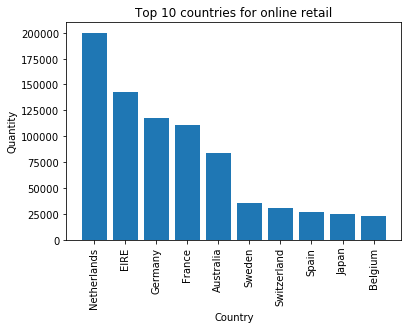

In [13]:
except_uk = online_rt[online_rt.Country != 'United Kingdom']
top10 = except_uk.groupby('Country').aggregate({'Quantity': np.sum}).sort_values('Quantity', ascending = False).head(10).reset_index()
plt.bar(top10.index, top10.Quantity)
plt.xticks(top10.index, top10.Country, rotation = 'vertical')
plt.gca().set_xlabel('Country')
plt.gca().set_ylabel('Quantity')
plt.gca().set_title('Top 10 countries for online retail')
plt.show()


### Step 5.  Exclude negative Quatity entries

In [20]:
positive_online_rt = online_rt[online_rt.Quantity > 0]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

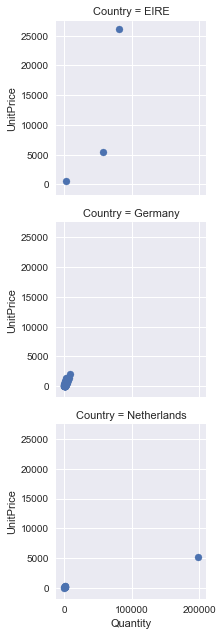

In [51]:
import seaborn as sns

top3 = positive_online_rt[positive_online_rt.Country.isin(top10.head(3).Country)]
top3grouped = top3.groupby(['Country', 'CustomerID']).agg(np.sum)
top3grouped['Country'] = top3grouped.index.get_level_values(0)

plt.show()

fg = sns.FacetGrid(top3grouped, "Country", size = 3)
fg.map(plt.scatter, "Quantity", "UnitPrice")
fg.add_legend();


### BONUS: Create your own question and answer it.